# Digit recognition

This notebook will explore the dataset from Kaggle's competition on the digit recognition and will use a number of Neural Networks to demonstrate their usage and utility.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

# Any results you write to the current directory are saved as output.

notebook.ipynb
test.csv
train.csv



In [3]:
myTrainDf = pd.read_csv('./train.csv')
myTestDf = pd.read_csv('./test.csv')

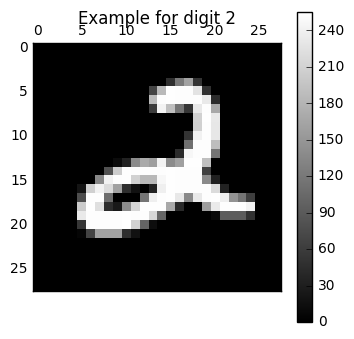

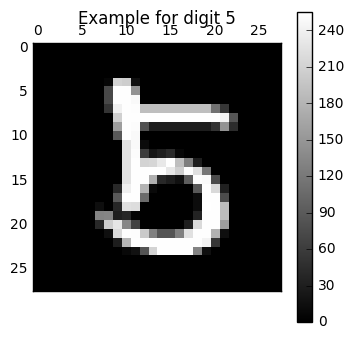

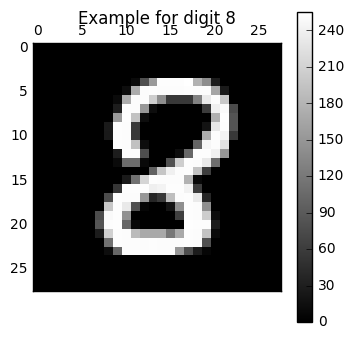

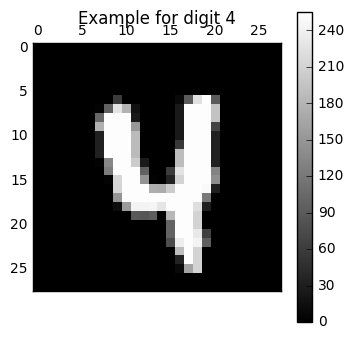

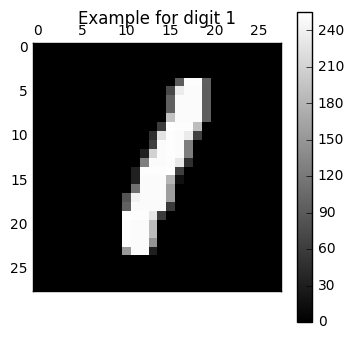

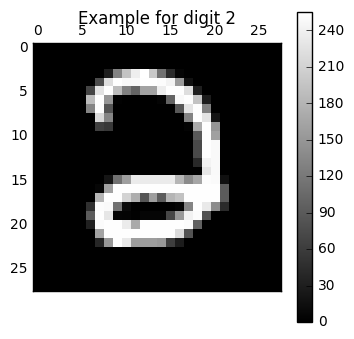

In [5]:
# Display some digits to understand how the data is structured
def formatDigit (aLine):
    return np.array(aLine).reshape((28,28))

NUM_EXAMPLES = 3

for i in (myTrainDf.shape[0]*np.random.rand(NUM_EXAMPLES)).astype(int):
    myImage = formatDigit(myTrainDf.iloc[i][1:])
    plt.matshow(myImage, cmap='gray')
    plt.colorbar()
    plt.title('Example for digit ' + str(myTrainDf.iloc[i][0]))
plt.show()



Now that we see how the data is organized, let's use a MLP, with an architecture as the one taught in "Machine Learning" from Stanford in coursera.org to recognize the digits.

The MLP will have 3 layers.

 - The input layer will have 784 units
 - The hidden layer will have 25 units
 - The output layer will have, obviously, 10 units. It will output 1 or 0 depending on the classification.

Note that the sizes of the input and output layers are given by the X and Y datasets.

In [6]:
from sklearn.neural_network import MLPClassifier

myX = myTrainDf[myTrainDf.columns[1:]]
myY = myTrainDf[myTrainDf.columns[0]]

# Use 'adam' solver for large datasets, alpha is the regularization term.
# Display the optimization by showing the cost.
myClf = MLPClassifier(hidden_layer_sizes=25, activation='logistic', solver='adam', 
                      alpha=1e-5, verbose=True)
myClf.fit(myX, myY)


Iteration 1, loss = 1.29878608
Iteration 2, loss = 0.67709982
Iteration 3, loss = 0.50819067
Iteration 4, loss = 0.44009089
Iteration 5, loss = 0.39960202
Iteration 6, loss = 0.36549293
Iteration 7, loss = 0.36288382
Iteration 8, loss = 0.33609627
Iteration 9, loss = 0.32925509
Iteration 10, loss = 0.32135664
Iteration 11, loss = 0.31321399
Iteration 12, loss = 0.31152007
Iteration 13, loss = 0.29096846
Iteration 14, loss = 0.29689426
Iteration 15, loss = 0.29752872
Iteration 16, loss = 0.27885551
Iteration 17, loss = 0.28623284
Iteration 18, loss = 0.28311547
Iteration 19, loss = 0.27550933
Iteration 20, loss = 0.28141069
Iteration 21, loss = 0.26909716
Iteration 22, loss = 0.26505256
Iteration 23, loss = 0.27136728
Iteration 24, loss = 0.27153929
Iteration 25, loss = 0.26094218
Iteration 26, loss = 0.25568391
Iteration 27, loss = 0.26306728
Iteration 28, loss = 0.26558655
Iteration 29, loss = 0.25744165
Training loss did not improve more than tol=0.000100 for two consecutive epochs. 

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [7]:
# Get the training error
myPredY = myClf.predict(myX)

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generic function to assess performance in two datasets
def showPerformance (aY, aYpred):
    # Ensure np.array
    print ('*** Performance Statistics ***')
    print ('Accuracy: ', accuracy_score(aY, aYpred))
    print ('Precision: ', precision_score(aY, aYpred, average='micro'))
    print ('Recall: ', recall_score(aY, aYpred, average='micro'))
    print ('F1: ', f1_score(aY, aYpred, average='micro'))

showPerformance(myY, myPredY)

*** Performance Statistics ***
('Accuracy: ', 0.91880952380952385)
('Precision: ', 0.91880952380952385)
('Recall: ', 0.91880952380952385)
('F1: ', 0.91880952380952385)


The results are quite good, as expected, now let's make a prediction for the test set.

In [17]:
myYtestPred = myClf.predict(myTestDf)
myOutDf = pd.DataFrame(index=myTestDf.index+1, data=myYtestPred)
myOutDf.reset_index().to_csv('submission.csv', header=['ImageId', 'Label'],index=False)

# Cross-validation set and regularization parameter
The following code will split the test set into a training set and cross-validation set.

In [49]:
REG_ARRAY = [100, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 0]

def splitDataset (aDf, aFrac):
    aTrainDf = aDf.sample(frac=aFrac)
    aXvalDf = aDf.iloc[[x for x in aDf.index if x not in aTrainDf.index]]
    return aTrainDf, aXvalDf

mySampleTrainDf, mySampleXvalDf = splitDataset(myTrainDf, 0.8)
myAccuracyDf = pd.DataFrame(index=REG_ARRAY, columns=['Accuracy'])
for myAlpha in REG_ARRAY:
    print ('Training with regularization param ', str(myAlpha))
    myClf = MLPClassifier(hidden_layer_sizes=25, activation='logistic', solver='adam', alpha=myAlpha, verbose=False)
    myClf.fit(mySampleTrainDf[mySampleTrainDf.columns[1:]], mySampleTrainDf['label'])
    myYpred = myClf.predict(mySampleXvalDf[mySampleXvalDf.columns[1:]])
    myAccuracyDf.loc[myAlpha, 'Accuracy'] = accuracy_score(mySampleXvalDf['label'], myYpred)
                            

('Training with regularization param ', '100')
('Training with regularization param ', '1')
('Training with regularization param ', '0.1')
('Training with regularization param ', '0.01')
('Training with regularization param ', '0.001')
('Training with regularization param ', '0.0001')
('Training with regularization param ', '1e-05')
('Training with regularization param ', '1e-06')


In [50]:
myAccuracyDf

,Accuracy
100.000000,0.794524
1.000000,0.916786
0.100000,0.907857
0.010000,0.915476
0.001000,0.91131
0.000100,0.914167
0.000010,0.912381
0.000001,0.915476


From here one can tell that the default regularization parameter (around 1e-5) 

## Multiple layers

In [55]:
REG_ARRAY = [100, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 0]
myAccuracyDf = pd.DataFrame(index=REG_ARRAY, columns=['Accuracy'])
for myAlpha in REG_ARRAY:
    print ('Training with regularization param ', str(myAlpha))
    myClf = MLPClassifier(hidden_layer_sizes=[400, 400, 100, 25], activation='logistic', solver='adam', alpha=myAlpha, verbose=False)
    myClf.fit(mySampleTrainDf[mySampleTrainDf.columns[1:]], mySampleTrainDf['label'])
    myYpred = myClf.predict(mySampleXvalDf[mySampleXvalDf.columns[1:]])
    myAccuracyDf.loc[myAlpha, 'Accuracy'] = accuracy_score(mySampleXvalDf['label'], myYpred)

('Training with regularization param ', '100')
('Training with regularization param ', '1')
('Training with regularization param ', '0.1')
('Training with regularization param ', '0.01')
('Training with regularization param ', '0.001')
('Training with regularization param ', '0.0001')
('Training with regularization param ', '1e-05')
('Training with regularization param ', '1e-06')


In [59]:
myAccuracyDf

,Accuracy
100.000000,0.11131
1.000000,0.859405
0.100000,0.938929
0.010000,0.947738
0.001000,0.950595
0.000100,0.952857
0.000010,0.953333
0.000001,0.955119


Let's produce a new output file with no regularization and a complex MLP of 784x400x400x100x25x10

In [61]:
myClf = MLPClassifier(hidden_layer_sizes=[400, 400, 100, 25], activation='logistic', solver='adam', alpha=0, verbose=True)
myClf.fit(myTrainDf[myTrainDf.columns[1:]], myTrainDf['label'])
myYtestPred = myClf.predict(myTestDf)
myOutDf = pd.DataFrame(index=myTestDf.index+1, data=myYtestPred)
myOutDf.reset_index().to_csv('submission2.csv', header=['ImageId', 'Label'],index=False)

Iteration 1, loss = 1.48914796
Iteration 2, loss = 0.70297860
Iteration 3, loss = 0.47447220
Iteration 4, loss = 0.38596537
Iteration 5, loss = 0.32632116
Iteration 6, loss = 0.30161584
Iteration 7, loss = 0.28495022
Iteration 8, loss = 0.26207085
Iteration 9, loss = 0.25405491
Iteration 10, loss = 0.23451597
Iteration 11, loss = 0.22767984
Iteration 12, loss = 0.21249031
Iteration 13, loss = 0.21919090
Iteration 14, loss = 0.21271175
Iteration 15, loss = 0.20228821
Iteration 16, loss = 0.19003368
Iteration 17, loss = 0.18257156
Iteration 18, loss = 0.18180574
Iteration 19, loss = 0.17218960
Iteration 20, loss = 0.17127701
Iteration 21, loss = 0.16904252
Iteration 22, loss = 0.16997119
Iteration 23, loss = 0.16630849
Iteration 24, loss = 0.15664504
Iteration 25, loss = 0.15898743
Iteration 26, loss = 0.15884830
Iteration 27, loss = 0.15243792
Iteration 28, loss = 0.14633444
Iteration 29, loss = 0.13669990
Iteration 30, loss = 0.13660347
Iteration 31, loss = 0.13635689
Iteration 32, los